In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree,metrics

In [2]:
data = pd.read_excel('Case1_data.xlsx')
data=data.drop(columns=['FlightNumber'])
is_NaN = data.isnull();row_has_NaN = is_NaN.any(axis=1);rows_with_NaN = data[row_has_NaN]
data = data.drop(list(rows_with_NaN.index))
data=data.reset_index()
data.AircraftType=data.AircraftType.astype('str')
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['Airline']]).toarray())
airline_d={}
for i in range (0,len(np.unique(data.Airline))):
    airline_d[i]=enc.categories_[0][i]
enc_df=enc_df.rename(columns=airline_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = pd.DataFrame(enc.fit_transform(data[['Destination']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Destination))):
    destination_d[i]=enc.categories_[0][i]
enc_df2=enc_df2.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df3 = pd.DataFrame(enc.fit_transform(data[['AircraftType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.AircraftType))):
    destination_d[i]=enc.categories_[0][i]
enc_df3=enc_df3.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df4 = pd.DataFrame(enc.fit_transform(data[['FlightType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.FlightType))):
    destination_d[i]=enc.categories_[0][i]
enc_df4=enc_df4.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df5 = pd.DataFrame(enc.fit_transform(data[['Sector']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Sector))):
    destination_d[i]=enc.categories_[0][i]
enc_df5=enc_df5.rename(columns=destination_d)
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute)
    
pd_time=pd.DataFrame.from_dict(DateTime_dic)
data=data.drop(columns=['index','ScheduleTime','Airline','Destination','AircraftType','FlightType','Sector'])
y=np.array(data.LoadFactor)
data=data.drop(columns='LoadFactor')
dfs=[enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data]
shapes=[enc_df.shape[1],enc_df2.shape[1],enc_df3.shape[1],enc_df4.shape[1],enc_df5.shape[1],
        pd_time.shape[1],data.shape[1]]
enc_df=pd.concat([enc_df]*2,axis=1)
enc_df3=pd.concat([enc_df3]*4,axis=1)
enc_df4=pd.concat([enc_df4]*77,axis=1)
enc_df5=pd.concat([enc_df5]*19,axis=1)
pd_time=pd.concat([pd_time]*46,axis=1)
data=pd.concat([data]*230,axis=1)
df = pd.concat([enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data], axis = 1)
X=np.array(df)
# NORMALIZATION
X_pre = X - np.mean(X,axis=0)
normalizer = preproc.Normalizer().fit(X_pre.T)  
X_pre = normalizer.transform(X_pre.T).T
min_max_scaler = preproc.MinMaxScaler()
y_pre = min_max_scaler.fit_transform(y.reshape(-1,1)).reshape(-1,)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.30, random_state=42)

In [4]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [5]:
y_pred=model.predict(X_test)

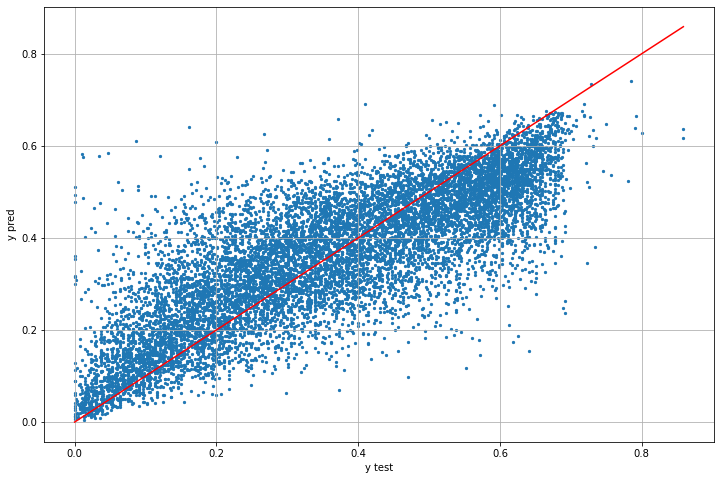

In [6]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [7]:
metrics.mean_absolute_error(y_test,y_pred)

0.08474383405776154